In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('Titanic-Dataset (1).csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [7]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Drop columns with too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Fill missing Age with median (more robust to outliers than mean)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode (most common port)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_12052\3447254687.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\MY DELL\AppData\Local\Temp\ipykernel_12052\3447254687.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
# Create binary gender column
df['IsFemale'] = (df['Sex'] == 'female').astype(int)

In [12]:
# Select predictor variables
predictors = ['Pclass', 'IsFemale', 'Age']
X = df[predictors].values

In [13]:
# Extract target variable if it exists
if 'Survived' in df.columns:
    y = df['Survived'].values
    print("Target variable y extracted.")
else:
    y = None
    print("No target variable found in dataset.")

# Show first 5 rows of input features
print("First 5 rows of input features (X):")
print(X[:5])

Target variable y extracted.
First 5 rows of input features (X):
[[ 3.  0. 22.]
 [ 1.  1. 38.]
 [ 3.  1. 26.]
 [ 1.  1. 35.]
 [ 3.  0. 35.]]


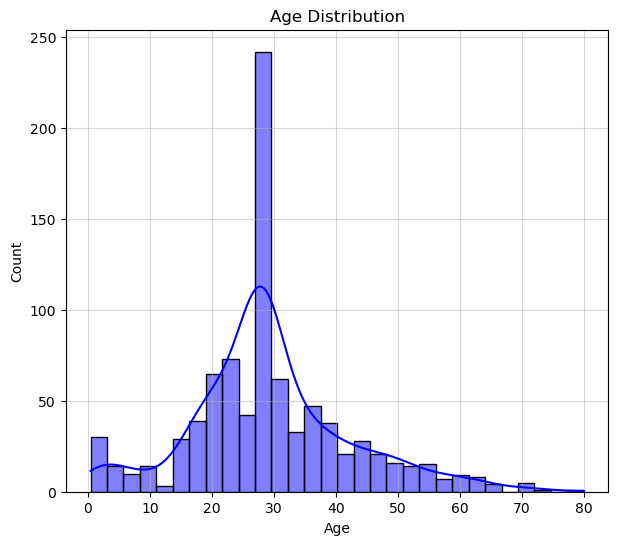

In [14]:
# data visiualization with hist plot, KDE plot and bar plot 
# Set figure size
plt.figure(figsize=(7, 6))

# Plot histogram with KDE for Age column
sns.histplot(data=df, x='Age', color='blue', kde=True, bins=30)

# Style the plot
plt.grid(True, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Show the plot
plt.show()

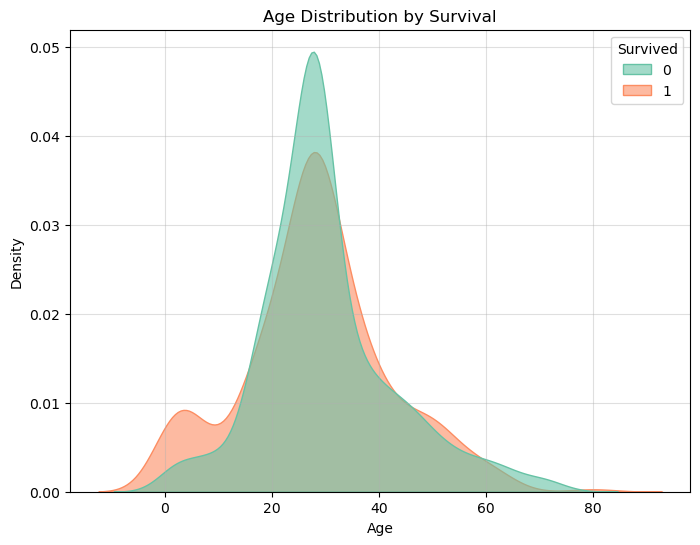

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette='Set2', alpha=0.6)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True, alpha=0.4)
plt.show()

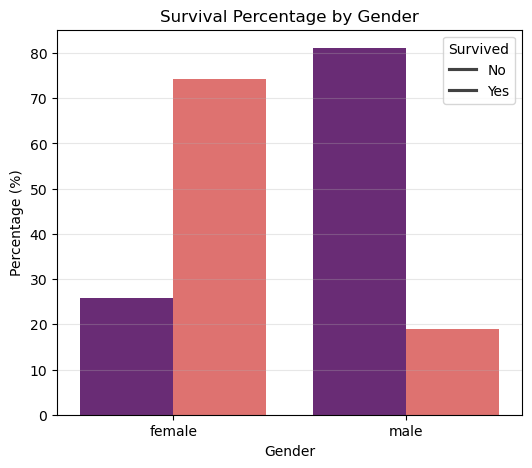

In [16]:
# Prepare percentage data
gender_survival_pct = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
gender_total = df.groupby('Sex').size().reset_index(name='Total')
merged = pd.merge(gender_survival_pct, gender_total, on='Sex')
merged['Percent'] = (merged['Count'] / merged['Total']) * 100

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(data=merged, x='Sex', y='Percent', hue='Survived', palette='magma')

plt.title('Survival Percentage by Gender')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [17]:
# Split for validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
# Train the model with logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [19]:
# Train the model with RandomForestClassifier with accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

# Prediction & accuracy
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy}')

# Final prediction on test set
predictions = model.predict(x_test)

Validation Accuracy: 0.8268156424581006
